# Can we detect climate misinformation by analysing a single word or phrase?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import sys

sys.path.insert(0, '../text_preprocessing/')

In [2]:
from preprocessing import *
from embeddings import *

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
path = '../labelled_data/labelled_data_14032021.csv'

print("Importing data...")
df = import_data(path)

print("\nDropping na values..")
df = na_values(df)

print("\nEncoding classes..")
df, label_columns = class_encoding(df)

# print("\nFiltering long doocuments and exploring length..")
# documents_len_exploration_and_filter(df,max_len=1500)

print("\nStarting text preprocessing..")
clean_text = preprocessing(df)

df['clean_text'] = clean_text

print(len(df))
df.head()

../text_preprocessing/preprocessing.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['human_label'] = encoded_classes
../text_preprocessing/preprocessing.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['human_binary_label'] = df_encoded['human_label'].apply(lambda label: 1 if label > 0 else 0)


Importing data...
   label                                               text
0    118  Buenos Aires Playa is an urban beach on the Rí...
1    123  Contributed by Robert Lyman  © 2017The United ...
2    119  Contributed by Robert Lyman  © 2017The United ...
3    119  Share this...FacebookTwitterState parliamentar...
4    122  [CHECK OUT OUR PLANS](https://thebfd.co.nz/sub...
Size of dataframe
Index(['label', 'text'], dtype='object')
(778, 2)

Dropping na values..
NaN values per column
label     0
text     62
dtype: int64

Encoding classes..
118 is encoded to [0]
119 is encoded to [1]
120 is encoded to [2]

Starting text preprocessing..
628


,text,human_label,human_binary_label,clean_text
0,Buenos Aires Playa is an urban beach on the Rí...,0,0,"[buenos, aire, playa, urban, beach, ro, de, la..."
2,Contributed by Robert Lyman © 2017The United ...,1,1,"[contribute, robert, lyman, unite, kingdom, fi..."
3,Share this...FacebookTwitterState parliamentar...,1,1,"[thisfacebooktwitterstate, parliamentarian, wo..."
5,"On April 7, I wrote about global warming “hoth...",0,0,"[april, write, global, warm, hothead, dominate..."
6,From PragerU\r\nHas environmentalism become mo...,2,1,"[prageru, environmentalism, become, good, fait..."


## Wordclouds for each Class

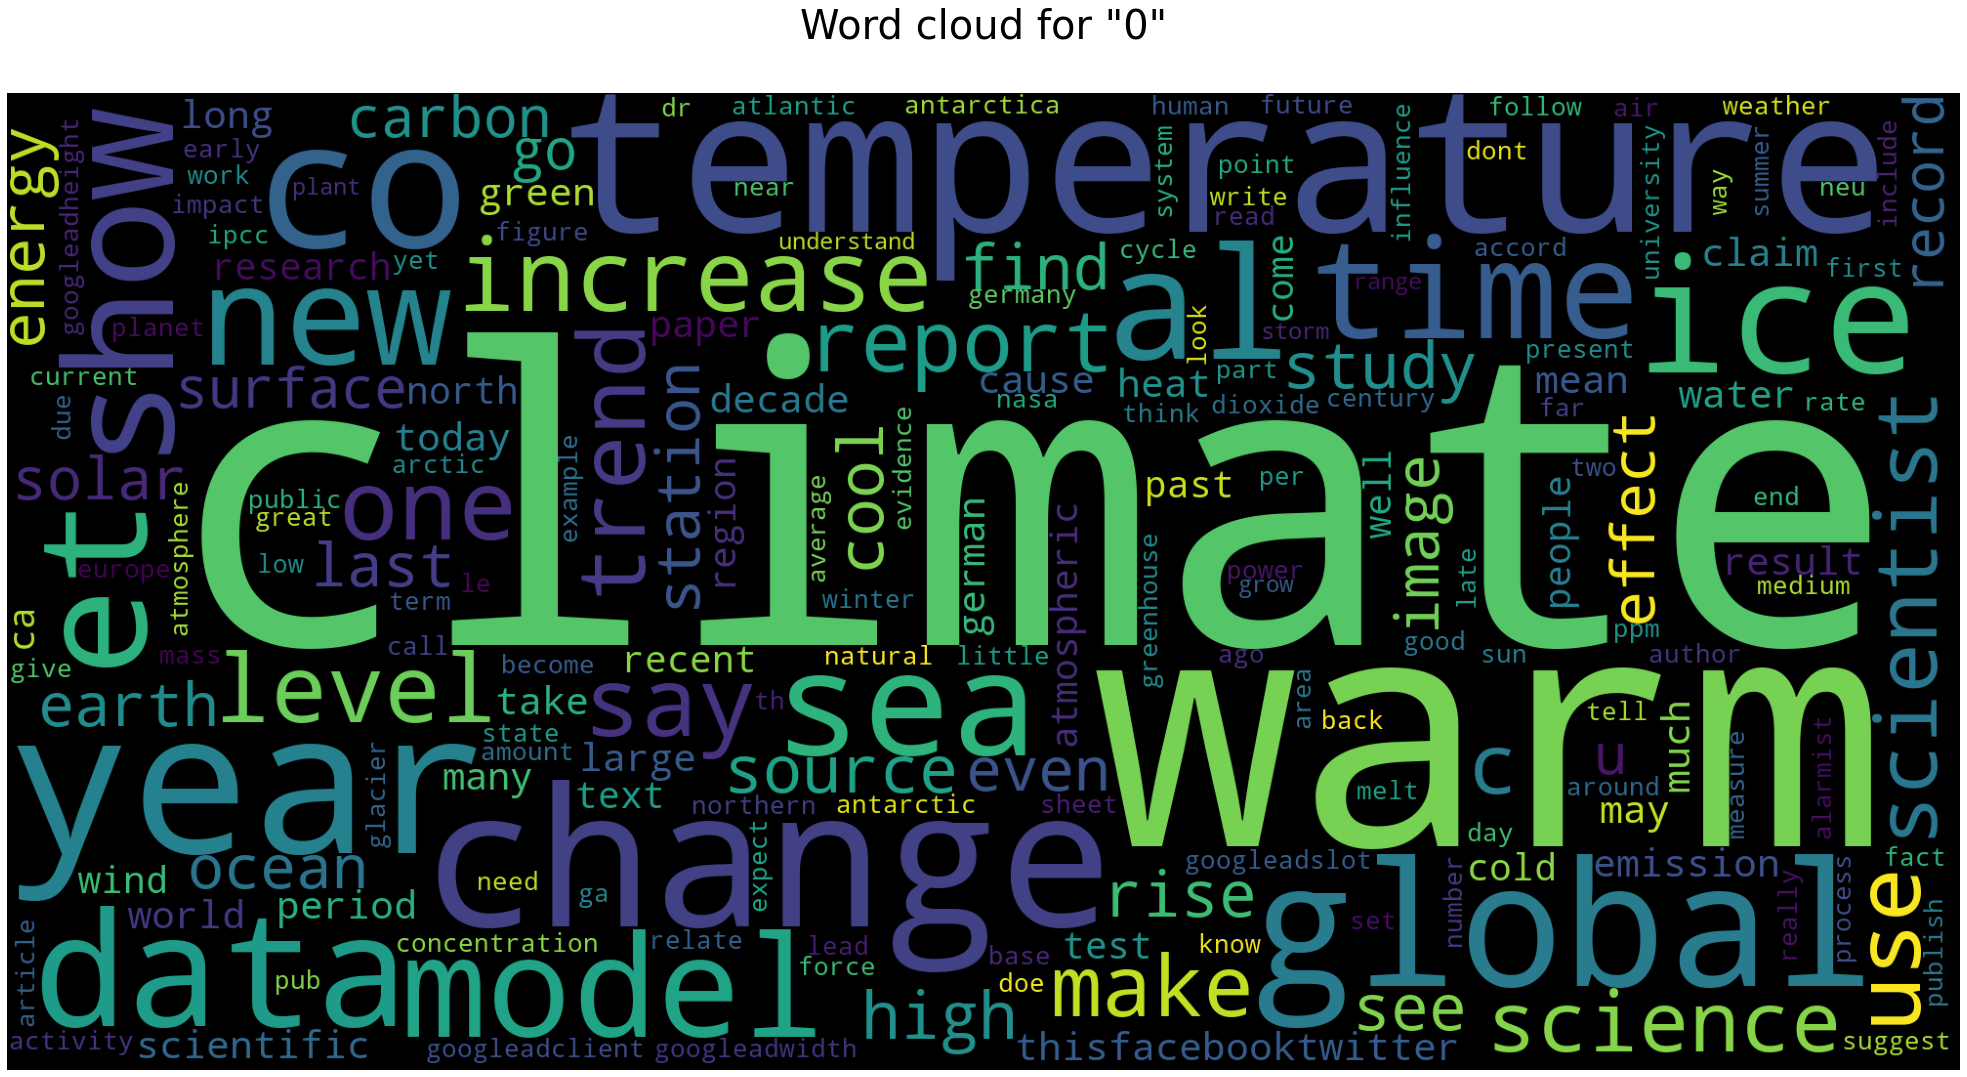



#########




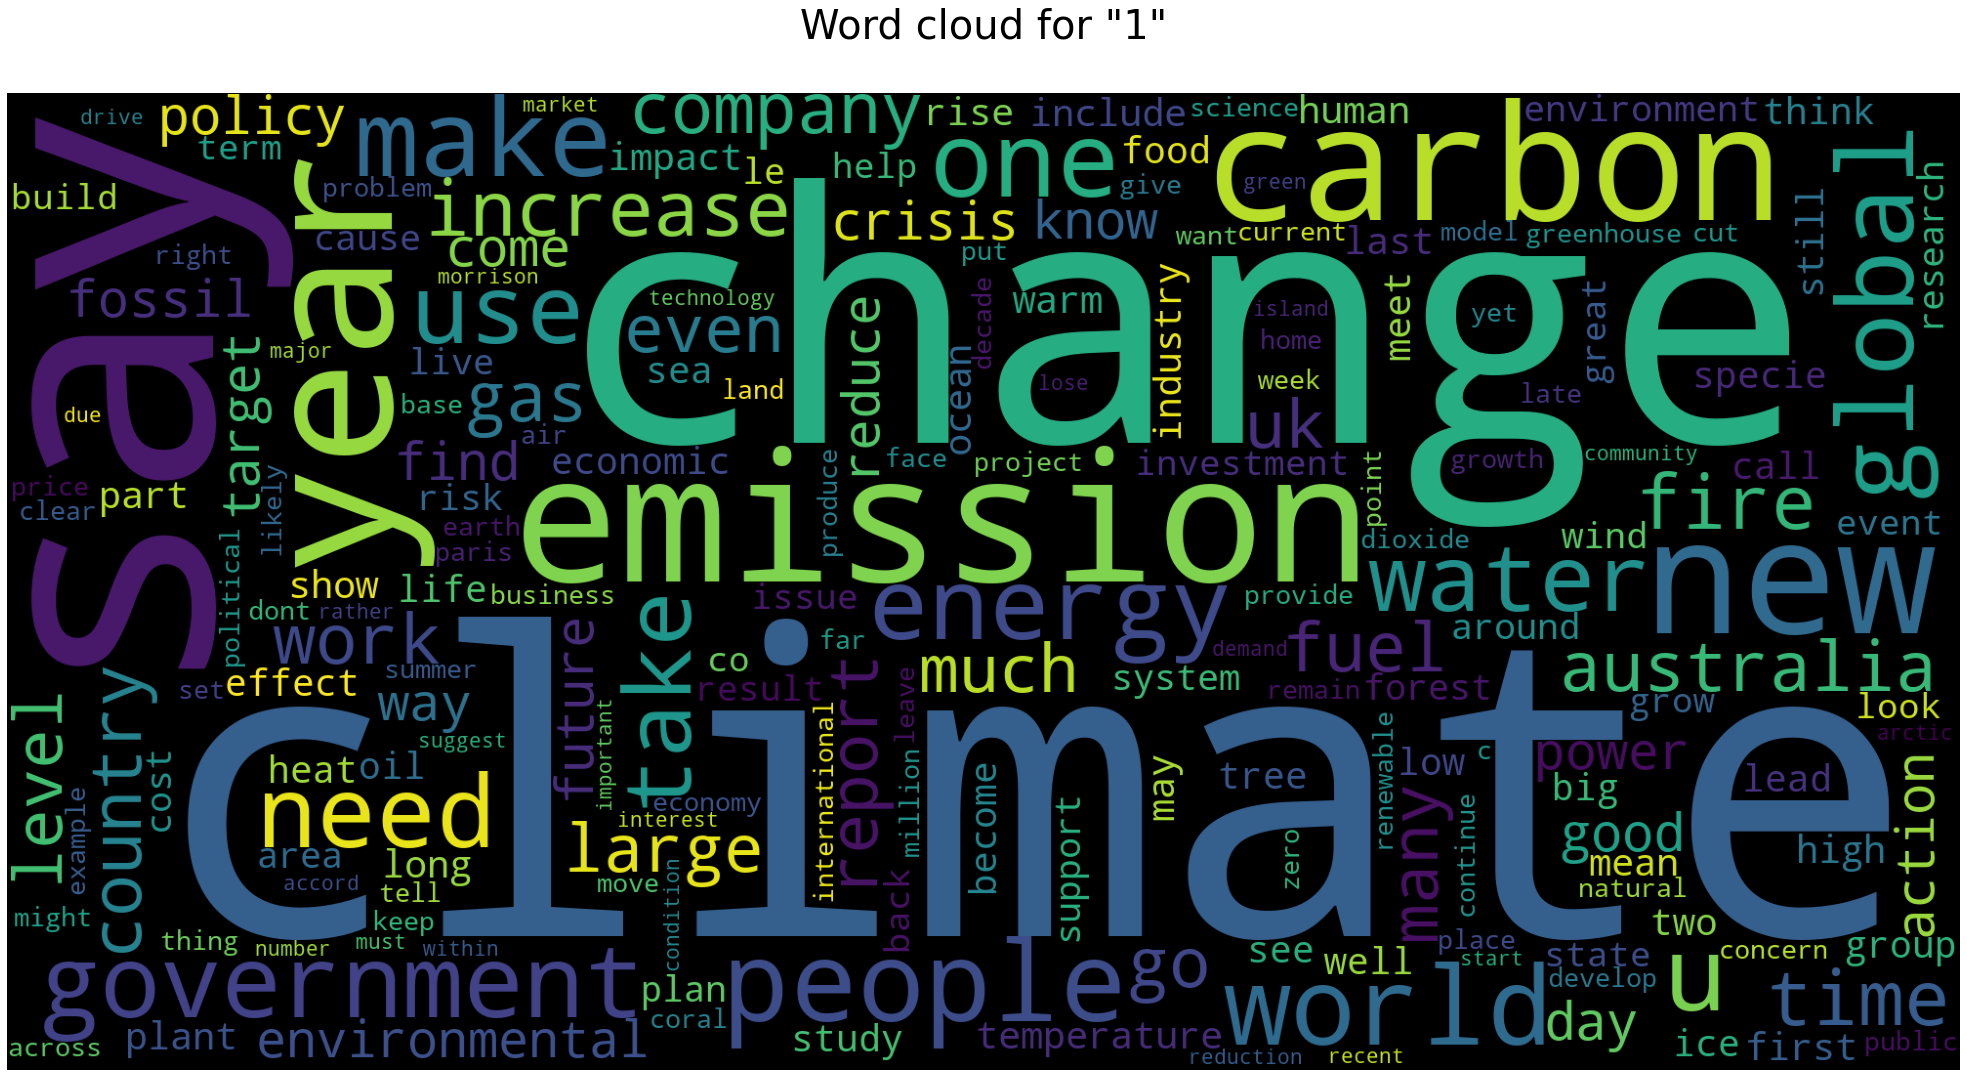



#########




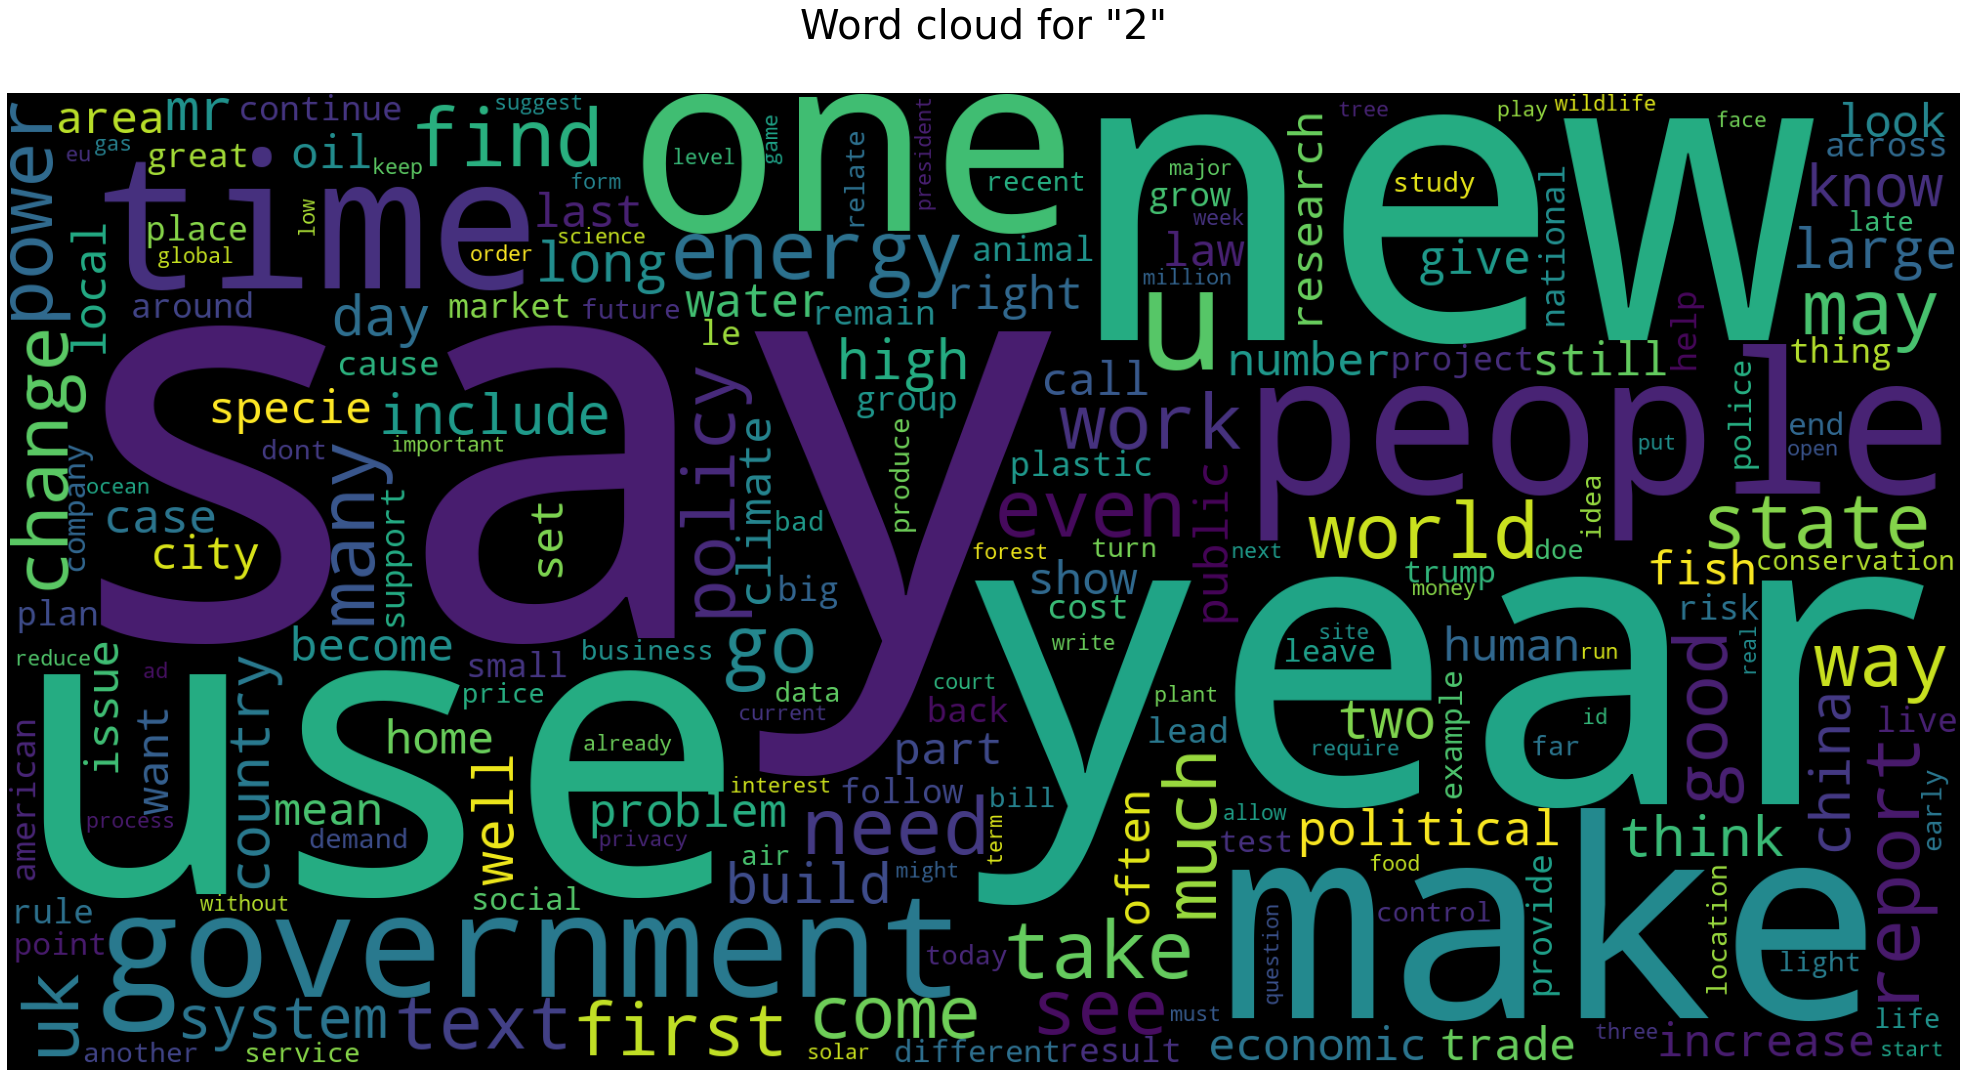



#########




In [4]:
# Same code can be used to generate wordclouds of other categories.
def plot_wordcloud(label):

    plt.figure(figsize=(35,20))

#     text = df[df.human_label == label].text.fillna("").values
    full_text = ""
    for doc in df[df.human_label == label].clean_text.to_list():
        for text in doc:
            full_text = "{0} {1}".format(full_text,text).strip()
    
    cloud_text = WordCloud(
                              stopwords=STOPWORDS,
                              background_color='black',
                              collocations=False,
                              width=2000,
                              height=1000
                             ).generate(full_text) #" ".join(text))
    plt.axis('off')
    plt.title('Word cloud for "{0}"\n'.format(label),fontsize=40)
    plt.imshow(cloud_text)
    plt.show()

for col in df.human_label.unique():
#     print(col)
    plot_wordcloud(col)
    print("\n\n#########\n\n")

## Most frequent Keywords

In [5]:
top_n = []
n = 500

for col in df.human_label.unique():
    print(col)
    words = []
    for doc in df.loc[df.human_label == col, 'clean_text'].to_list():
        words += doc

    d = {
        "label": col,
        "top_{0}".format(n): pd.Series(words).value_counts()[:n].index
    }
    top_n.append(d)

top_n

0
1
2


[{'label': 0,
  'top_500': Index(['climate', 'warm', 'temperature', 'year', 'change', 'co', 'global',
         'data', 'ice', 'al',
         ...
         'therefore', 'center', 'climategate', 'move', 'review', 'determine',
         'warn', 'sensor', 'kachelmann', 'soon'],
        dtype='object', length=500)},
 {'label': 1,
  'top_500': Index(['climate', 'change', 'say', 'emission', 'year', 'carbon', 'people',
         'new', 'world', 'would',
         ...
         'africa', 'capacity', 'divestment', 'along', 'protection', 'experience',
         'turbine', 'prepare', 'threaten', 'course'],
        dtype='object', length=500)},
 {'label': 2,
  'top_500': Index(['say', 'would', 'year', 'use', 'make', 'one', 'people', 'new', 'also',
         'time',
         ...
         'palm', 'bee', 'damage', 'chinese', 'paper', 'supply', 'five',
         'foreign', 'care', 'official'],
        dtype='object', length=500)}]

In [6]:
def word_analysis(word_list, min_length=4, min_freq=0.1, max_freq_other=0.1):
    i = 0

    # min_length = 4
    # min_freq = 0.1
    # max_freq_other = 0.1

    for word in sorted(word_list):
        if len(word) < min_length:
            continue

    #     freq = df.loc[df.text.fillna("").str.contains(word, regex=False, case=False).fillna(False), "human_label"].value_counts() / df.human_label.value_counts()
        mask = df.clean_text.apply(lambda x: word in x)
        freq = df.loc[mask, "human_label"].value_counts() / df.human_label.value_counts()
        if (freq[0] < min_freq) or (freq[1] > max_freq_other) and (freq[2] > max_freq_other):
            continue

        i += 1
        print("\n\n##### {0}\n".format(word))
        print(freq)

    print("\n\n##### {0} words selected for analysis".format(i))

In [7]:
word_analysis(top_n[0]["top_{0}".format(n)], min_freq=0.3, max_freq_other=0.1)



##### googleadclient

0    0.516393
2    0.054299
1    0.049080
Name: human_label, dtype: float64


##### googleadheight

0    0.516393
2    0.054299
1    0.049080
Name: human_label, dtype: float64


##### googleadslot

0    0.516393
2    0.054299
1    0.049080
Name: human_label, dtype: float64


##### googleadwidth

0    0.516393
2    0.054299
1    0.049080
Name: human_label, dtype: float64


##### image

0    0.323770
2    0.099548
1    0.061350
Name: human_label, dtype: float64


##### temperature

0    0.500000
1    0.300613
2    0.081448
Name: human_label, dtype: float64


##### thisfacebooktwitter

0    0.663934
2    0.076923
1    0.061350
Name: human_label, dtype: float64


##### trend

0    0.348361
1    0.104294
2    0.063348
Name: human_label, dtype: float64


##### warm

0    0.614754
1    0.343558
2    0.076923
Name: human_label, dtype: float64


##### 9 words selected for analysis


## Most frequent Keywords (misinfo focus)

In [8]:
top_misinfo_only = []

for val in top_n[0]["top_{0}".format(n)]:
    if (val in top_n[1]["top_{0}".format(n)]) or (val in top_n[2]["top_{0}".format(n)]):
        continue
    top_misinfo_only.append(val)

len(top_misinfo_only), top_misinfo_only

(139,
 ['al',
  'et',
  'trend',
  'cool',
  'thisfacebooktwitter',
  'ca',
  'atmospheric',
  'googleadheight',
  'pub',
  'googleadslot',
  'googleadclient',
  'neu',
  'googleadwidth',
  'winter',
  'nasa',
  'concentration',
  'cycle',
  'ppm',
  'sheet',
  'antarctica',
  'antarctic',
  'ipcc',
  'atlantic',
  'dr',
  'sun',
  'alarmist',
  'northern',
  'influence',
  'article',
  'mass',
  'th',
  'author',
  'range',
  'institute',
  'observe',
  'variability',
  'measurement',
  'factor',
  'wm',
  'positive',
  'professor',
  'elevate',
  'observation',
  'indicate',
  'age',
  'greenland',
  'cloud',
  'comment',
  'thermometer',
  'analysis',
  'percent',
  'coast',
  'anthropogenic',
  'negative',
  'degree',
  'projection',
  'satellite',
  'true',
  'snow',
  'mid',
  'meter',
  'greta',
  'forecast',
  'rahmstorf',
  'overall',
  'july',
  'feedback',
  'vegetation',
  'man',
  'chart',
  'pattern',
  'phase',
  'jma',
  'february',
  'gi',
  'book',
  'hot',
  'precipi

In [9]:
# i = 0

# min_length = 4
# min_freq = 0.1
# max_freq_other = 0.1

# for word in sorted(top_misinfo_only):
#     if len(word) < min_length:
#         continue
    
# #     freq = df.loc[df.text.fillna("").str.contains(word, regex=False, case=False).fillna(False), "human_label"].value_counts() / df.human_label.value_counts()
#     mask = df.clean_text.apply(lambda x: word in x)
#     freq = df.loc[mask, "human_label"].value_counts() / df.human_label.value_counts()
#     if (freq[0] < min_freq) or (freq[1] > max_freq_other) and (freq[2] > max_freq_other):
#         continue
        
#     i += 1
#     print("\n\n##### {0}\n".format(word))
#     print(freq)
    
# print("\n\n##### {0} words selected for analysis".format(i))

word_analysis(top_misinfo_only)



##### alarmist

0    0.192623
1    0.030675
2    0.004525
Name: human_label, dtype: float64


##### analysis

0    0.143443
1    0.128834
2    0.076923
Name: human_label, dtype: float64


##### anthropogenic

0    0.118852
2    0.013575
1    0.006135
Name: human_label, dtype: float64


##### atlantic

0    0.118852
1    0.055215
2    0.036199
Name: human_label, dtype: float64


##### atmospheric

0    0.196721
1    0.073620
2    0.013575
Name: human_label, dtype: float64


##### author

0    0.159836
1    0.116564
2    0.058824
Name: human_label, dtype: float64


##### center

0    0.114754
2    0.113122
1    0.036810
Name: human_label, dtype: float64


##### central

0    0.110656
1    0.147239
2    0.067873
Name: human_label, dtype: float64


##### chart

0    0.122951
1    0.018405
2    0.013575
Name: human_label, dtype: float64


##### choose

0    0.131148
1    0.147239
2    0.076923
Name: human_label, dtype: float64


##### comment

0    0.135246
1    0.092025
2    0.058824
Nam

## Curated Keywords from Notion

In [10]:
notion_words_misinfo = ["climatecult", "climatehysteria", "globalcooling", "climatescam", "climatehoax", "climatechangehoax",
                        "greenwashing"]

notion_words_climate = ["TheTimeIsNow", "weneedexperts", "ecology", "climatechange", "HowtoSavethePlanet", "VoiceForThePlanet",
                        "FightForYourWorld", "connect2earth", "globalwarming"]

notion_words_notrel = ["coronavirus"]

notion_keywords = [
    {"label": "Climate Misinformation", "words": notion_words_misinfo},
    {"label": "Climate Related", "words": notion_words_climate},
    {"label": "Not Climate Related", "words": notion_words_notrel},
]

for k in notion_keywords:
    print("\n-------------------------------\n{0}\n{1}".format(k["label"], k["words"]))

# df.loc[df.text.fillna("").str.contains("({0})".format("|".join(notion_words_misinfo), case=False)), "human_label"].value_counts() / df.human_label.value_counts()

#     for word in k["words"]:
# #         freq = df.loc[df.text.fillna("").str.contains(word, regex=False, case=False).fillna(False), "human_label"].value_counts() / df.human_label.value_counts()
#         mask = df.clean_text.apply(lambda x: word in x)
#         freq = df.loc[mask, "human_label"].value_counts() / df.human_label.value_counts()
#         print("\n\n##### {0}\n".format(word))
#         print(freq)

    word_analysis(k["words"], min_freq=0, max_freq_other=1)


-------------------------------
Climate Misinformation
['climatecult', 'climatehysteria', 'globalcooling', 'climatescam', 'climatehoax', 'climatechangehoax', 'greenwashing']


##### climatechangehoax

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatecult

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatehoax

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatehysteria

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatescam

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### globalcooling

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### greenwashing

0        NaN
1    0.01227
2        NaN
Name: human_label, dtype: float64


##### 7 words selected for analysis

-------------------------------
Climate Related
['TheTimeIsNow', 'weneedexperts', 'ecology', 'climatechange', 'HowtoSavethePlanet', 'VoiceForThePlanet', 'FightForYourWorld', 'connect2earth', 'globalwarming